# SOLN - sunpy tutorial

this tutorial will walk through two applications of sunpy: data tools and coordinates

run `conda install sunpy` in your terminal first

### data!

data tools - search and download with Fido
- Fido is the sunpy software interface and allows you to make data queries
- the `attrs` (read: atributes) submodule is how data is searched. attributes can be combined to build queries

In [9]:
from sunpy.net import Fido, attrs as a
from astropy import units as u

In [5]:
Fido

Client,Description
CDAWEBClient,Provides access to query and download from the Coordinated Data Analysis Web (CDAWeb).
ADAPTClient,Provides access to the ADvanced Adaptive Prediction Technique (ADAPT) products of the National Solar Observatory (NSO).
EVEClient,Provides access to Level 0CS Extreme ultraviolet Variability Experiment (EVE) data.
GBMClient,Provides access to data from the Gamma-Ray Burst Monitor (GBM) instrument on board the Fermi satellite.
XRSClient,Provides access to several GOES XRS files archive.
SUVIClient,Provides access to data from the GOES Solar Ultraviolet Imager (SUVI).
GONGClient,Provides access to the Magnetogram products of NSO-GONG synoptic Maps.
LYRAClient,Provides access to the LYRA/Proba2 data archive.
NOAAIndicesClient,Provides access to the NOAA solar cycle indices.
NOAAPredictClient,Provides access to the NOAA SWPC predicted sunspot Number and 10.7 cm radio flux values.


the main attributes in the `attrs` submodule are time, instrument, and wavelength

In [6]:
a.Time

Attribute Name,Client,Full Name,Description
all,NOAAIndices,all,All values of this type are supported.
all,NOAAPredict,all,All values of this type are supported.


In [7]:
a.Instrument

Attribute Name,Client,Full Name,Description
adapt,ADAPT,ADAPT,ADvanced Adaptive Prediction Technique.
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"


In [ ]:
a.Wavelength    # add units to this tool with astropy's units module

Attribute Name,Client,Full Name,Description
all,NoRH,all,All values of this type are supported.
all,SUVI,all,All values of this type are supported.


Fido can use attributes to search for data with `Fido.search`. these results are a `UnifiedResponse` object and can be handed to `Fido.fetch` to download the data.

let's try an example. construct a query to find data from june 15, 2025 between 1:00 and 1:15 pm from the Atmospheric Imaging Assembly (AIA) with a wavelength of 171 Angstrom. i don't want every single data point, i only want one for each minute of the instrument's observation (sample rate of one minute)

In [31]:
start = '2025-06-15 13:00'
end = '2025-06-15 13:15'
wav = 171*u.angstrom
samp = 1*u.min

times = a.Time(start, end)
instrmt = a.Instrument('aia')    # fill this in from the options of instruments returned by `a.Instruments`
wavelen = a.Wavelength(wav)
samp_rate = a.Sample(samp)

res = Fido.search(times, instrmt, wavelen, samp_rate)


In [32]:
res

Start Time,End Time,Source,Instrument,Wavelength,Provider,Physobs,Wavetype,Extent Type,Size
,,,,Angstrom,,,,,Mibyte
Time,Time,str3,str3,float64[2],str8,str9,str6,str8,float64
2025-06-15 13:00:00.000,2025-06-15 13:00:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562
2025-06-15 13:03:00.000,2025-06-15 13:03:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562
2025-06-15 13:06:00.000,2025-06-15 13:06:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562
2025-06-15 13:09:00.000,2025-06-15 13:09:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562
2025-06-15 13:12:00.000,2025-06-15 13:12:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562
2025-06-15 13:15:00.000,2025-06-15 13:15:00.000,SDO,AIA,171.0 .. 171.0,SDAC_AIA,intensity,NARROW,FULLDISK,4.01562


In [34]:
res.all_colnames

['End Time',
 'Extent Type',
 'Instrument',
 'Physobs',
 'Provider',
 'Size',
 'Source',
 'Start Time',
 'Wavelength',
 'Wavetype',
 'fileid']

this is just a surface level intro to sunpy, look into the additional resources to learn more (how to query with multiple instruments, download data, work with the result, etc)

## coordinates!

plotting spacecraft in perihelion

In [47]:
import numpy as np
from matplotlib.pyplot import Figure
from reproject import reproject_interp

from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from sunpy.coordinates import get_horizons_coord
from sunpy.time import parse_time

In [38]:
perihelion_time = parse_time('2020-06-07 08:23')
perihelion_sequence = perihelion_time + np.arange(-14, 15)*u.day    # creates 4 weeks with perihelion in the middle

In [ ]:
# locations of Parker Solar Probe and SDO and put into heliocentric inertial (HCI) coords
psp_coord = get_horizons_coord('Parker Solar Probe', perihelion_sequence).heliocentricinertial
sdo_coord = get_horizons_coord('SDO', perihelion_sequence).heliocentricinertial

2025-06-15 16:57:41 - sunpy - INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96)


INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]


2025-06-15 16:57:42 - sunpy - INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spacecraft) (-136395)


INFO: Obtained JPL HORIZONS location for Solar Dynamics Observatory (spacecraft) (-136395) [sunpy.coordinates.ephemeris]


In [56]:
# make HCI plot
fig = Figure(dpi=150)
ax = fig.add_subplot(projection='polar')

ax.plot(psp_coord.lon.to('rad'), psp_coord.distance, '.', markersize=3, label='PSP')
ax.plot(sdo_coord.lon.to('rad'), sdo_coord.distance, '.', markersize=3, label='SDO')

ax.legend(loc='lower right')
ax.set_title('Positions in Heliocentric Inertial (HCI)')


Text(0.5, 1.0, 'Positions in Heliocentric Inertial (HCI)')

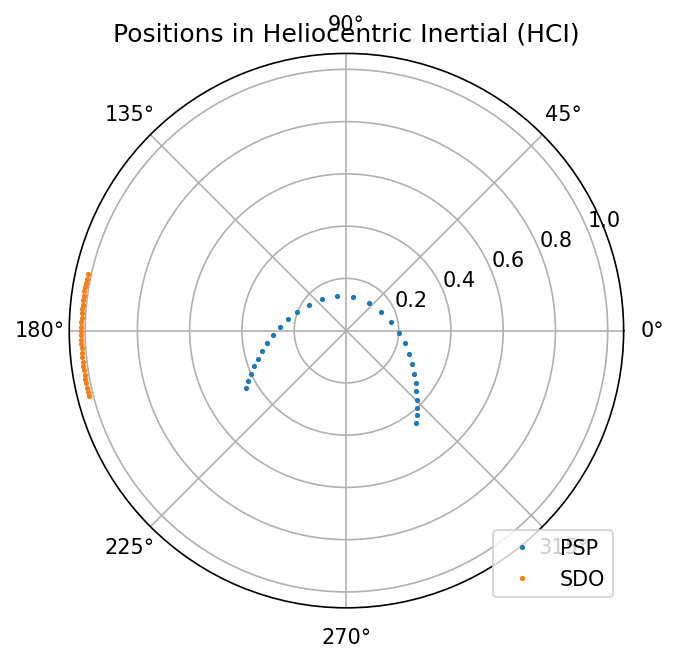

In [ ]:
fig

again, this is just a intro to the capailities of sunpy. please take a look at the addtl resources to learn more about different coordinate systems, map projections, and tracking solar features as they rotate.

tutorial adapted from [AAS 2021 workshop](https://github.com/sunpy/aas-2021-workshop/blob/main/01-Search-and-Download-Solar-Data.ipynb) and [AAS 2021 workshop](https://github.com/sunpy/aas-2021-workshop/blob/main/04-Fabulous-and-Powerful-SunPy-Coordinates.ipynb)